In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
import assaytools

In [3]:
from assaytools import platereader

In [4]:
filenames = [
    '2017-11-20 15-48-06_plate_1.xml',
    '2017-11-20 16-17-59_plate_1.xml',
    '2017-11-20 16-41-35_plate_1.xml',
    '2017-11-20 16-59-09_plate_1.xml',
    '2017-11-20 17-19-31_plate_1.xml',
    '2017-11-20 17-37-37_plate_1.xml',
    '2017-11-20 17-58-04_plate_1.xml',
    '2017-11-20 18-16-02_plate_1.xml',
    '2017-11-20 18-35-42_plate_1.xml',
    '2017-11-20 18-54-33_plate_1.xml',
    '2017-11-20 19-12-49_plate_1.xml',
    '2017-11-20 19-31-32_plate_1.xml'
]
datapath = '20171119_p38_single_well_binding_assay/infinite reads'

In [5]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.74937932e-08,
         3.82541000e-08,   8.36511642e-08,   1.82922021e-07,
         4.00000000e-07,   8.74689659e-07,   1.91270500e-06,
         4.18255821e-06,   9.14610104e-06,   2.00000000e-05])


In [6]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

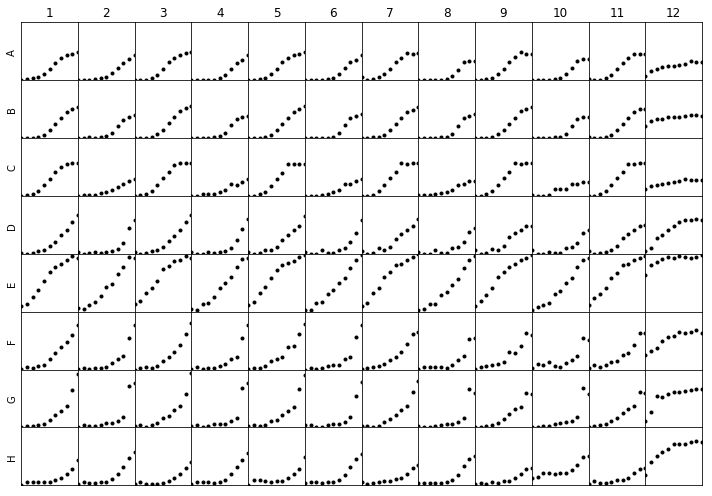

In [7]:
fig = plt.figure(figsize=[10,7])
nrows = 8
ncols = 12
index = 0

label = '280_480_TOP_100'
data = np.zeros([nrows, ncols, nreads], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        measurements = [ reads[i][label][well] for i in range(nreads) ]        
        data[row_index,col_index,:] = np.array(measurements)

xmax = concentrations.max()
ymax = data.max().max().max()
        
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        plt.loglog(concentrations, data[row_index,col_index,:], 'k.');
        plt.axis([0, xmax, 0, ymax])
        plt.xticks([]);
        plt.yticks([]);
        if row_index == 0:
            plt.title(col);
        if col_index == 0:
            plt.ylabel(row);
        index += 1
        
plt.tight_layout();
fig.subplots_adjust(wspace=0, hspace=0)

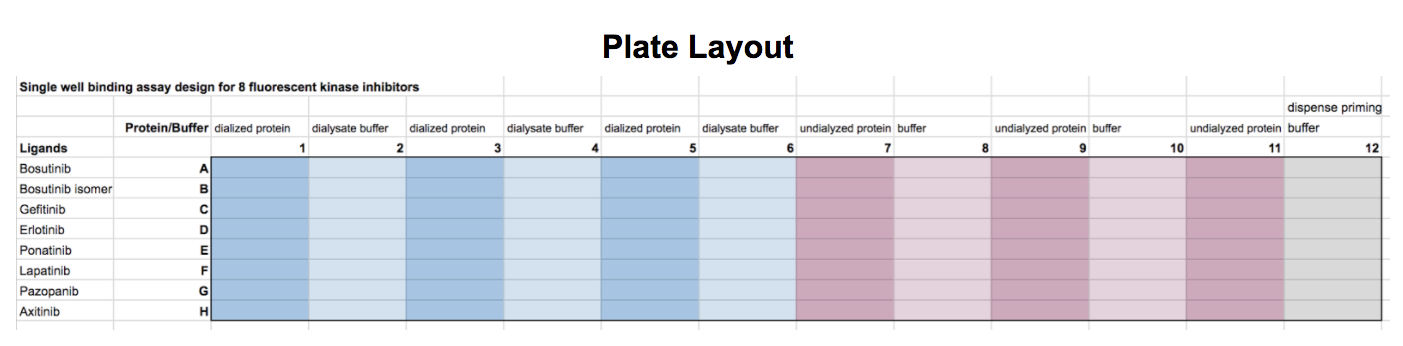


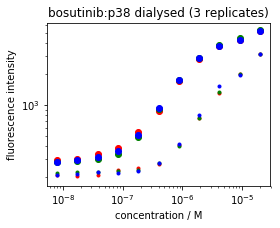

In [8]:
plt.figure(figsize=[4,3]);
plt.loglog(concentrations, data[0,0,:], 'ro');
plt.loglog(concentrations, data[0,2,:], 'go');
plt.loglog(concentrations, data[0,4,:], 'bo');
plt.loglog(concentrations, data[0,1,:], 'r.');
plt.loglog(concentrations, data[0,3,:], 'g.');
plt.loglog(concentrations, data[0,5,:], 'b.');
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('bosutinib:p38 dialysed (3 replicates)')

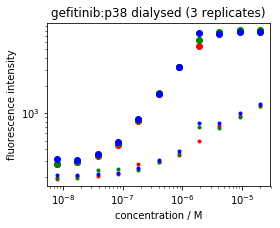

In [9]:
row = 2
plt.figure(figsize=[4,3]);
plt.loglog(concentrations, data[row,0,:], 'ro');
plt.loglog(concentrations, data[row,2,:], 'go');
plt.loglog(concentrations, data[row,4,:], 'bo');
plt.loglog(concentrations, data[row,1,:], 'r.');
plt.loglog(concentrations, data[row,3,:], 'g.');
plt.loglog(concentrations, data[row,5,:], 'b.');
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('gefitinib:p38 dialysed (3 replicates)');

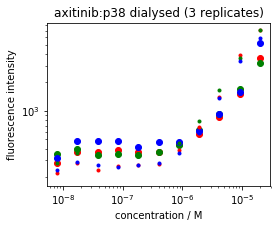

In [10]:
row = 7
plt.figure(figsize=[4,3]);
plt.loglog(concentrations, data[row,0,:], 'ro');
plt.loglog(concentrations, data[row,2,:], 'go');
plt.loglog(concentrations, data[row,4,:], 'bo');
plt.loglog(concentrations, data[row,1,:], 'r.');
plt.loglog(concentrations, data[row,3,:], 'g.');
plt.loglog(concentrations, data[row,5,:], 'b.');
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('axitinib:p38 dialysed (3 replicates)');